# Freeform Programming Assessment

This notebook uses data from the OpenPowerlifting project, https://www.openpowerlifting.org.

You may download a copy of the data at https://data.openpowerlifting.org or https://openpowerlifting.gitlab.io/opl-csv/bulk-csv.html.

OpenPowerlifting is a community service project to create a permanent, open archive of the world's powerlifting data. All data available on the website is contributed to the public domain.

### Reading in the data

The data will contain powerlifting information for men who participated in a powerlifting meet from the years 2005 - 2024. 

It is a snippet of the full data available on the website, as the file size was too large for Turnitin. Please see 'data_trimming.ipynb' in the project folder to see how I cut down the raw data.

In [2]:
import pandas as pd

powerlifting_data = pd.read_csv("male_powerlifting_2005_2024.csv.gz", low_memory = False, compression = "gzip")

powerlifting_data.head()

,Name,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned,Year
0,Nauris Kalašņikovs,SBD,Wraps,NaN,13-15,NaN,T1,38.8,44,50.0,...,NaN,WPC-Latvia,WPC,2011-12-17,Latvia,NaN,Dobele,Latvian Championships,Yes,2011
1,Raivo Berkins,SBD,Wraps,NaN,NaN,NaN,Y,42.8,44,35.0,...,NaN,WPC-Latvia,WPC,2011-12-17,Latvia,NaN,Dobele,Latvian Championships,Yes,2011
2,Dāvis Vilks,SBD,Wraps,NaN,13-15,NaN,T1,47.0,48,50.0,...,NaN,WPC-Latvia,WPC,2011-12-17,Latvia,NaN,Dobele,Latvian Championships,Yes,2011
3,Gvido Granauskis,SBD,Wraps,NaN,13-15,NaN,T1,51.7,52,55.0,...,NaN,WPC-Latvia,WPC,2011-12-17,Latvia,NaN,Dobele,Latvian Championships,Yes,2011
4,Dinārs Skuja,SBD,Wraps,NaN,13-15,NaN,T1,52.8,56,55.0,...,NaN,WPC-Latvia,WPC,2011-12-17,Latvia,NaN,Dobele,Latvian Championships,Yes,2011


### Data Analysis

In [3]:
# checking every column name in the dataframe
print(powerlifting_data.columns)

Index(['Name', 'Event', 'Equipment', 'Age', 'AgeClass', 'BirthYearClass',
       'Division', 'BodyweightKg', 'WeightClassKg', 'Best3SquatKg',
       'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Tested',
       'Country', 'State', 'Federation', 'ParentFederation', 'Date',
       'MeetCountry', 'MeetState', 'MeetTown', 'MeetName', 'Sanctioned',
       'Year'],
      dtype='object')


In [4]:
# printing shape of the dataframe
print(powerlifting_data.shape)

(1457215, 26)


In [5]:
# printing the summary information of the dataframe
print(powerlifting_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457215 entries, 0 to 1457214
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Name              1457215 non-null  object 
 1   Event             1457215 non-null  object 
 2   Equipment         1457215 non-null  object 
 3   Age               885412 non-null   float64
 4   AgeClass          1038114 non-null  object 
 5   BirthYearClass    910347 non-null   object 
 6   Division          1456305 non-null  object 
 7   BodyweightKg      1446477 non-null  float64
 8   WeightClassKg     1440564 non-null  object 
 9   Best3SquatKg      1397226 non-null  float64
 10  Best3BenchKg      1373551 non-null  float64
 11  Best3DeadliftKg   1365461 non-null  float64
 12  TotalKg           1343046 non-null  float64
 13  Place             1457215 non-null  object 
 14  Tested            1186914 non-null  object 
 15  Country           798833 non-null   object 
 16  

<Axes: >

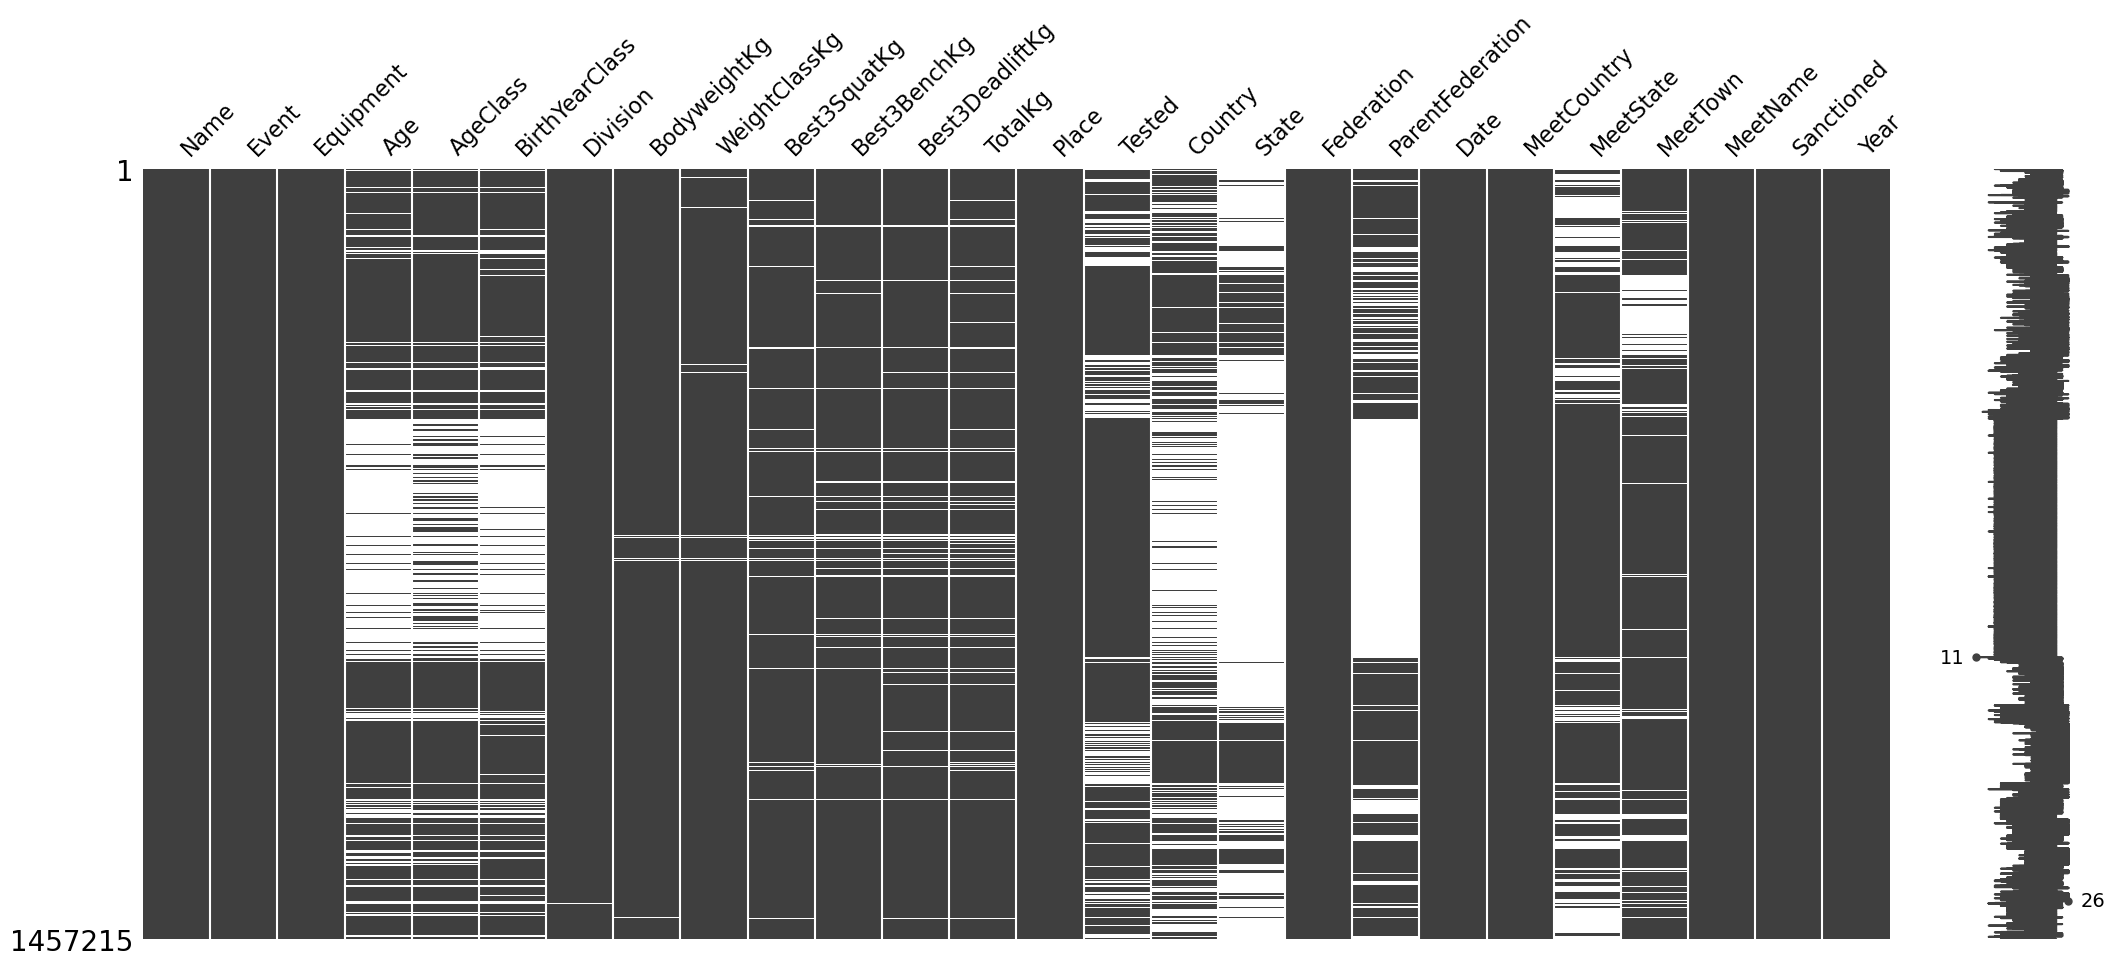

In [6]:
# checking missing values in each column using missingno
import missingno as msno

# this will create a matrix visualization of missing values
msno.matrix(powerlifting_data)

In powerlifting competitions, lifters are given three attempts for each movement (similar to high jump in the Olympics for example). Additionally, sometimes a competitor will make an optional fourth attempt if they want to push for a new personal record (PR). This fourth attempt is not used in scoring.

In 'data_trimming.ipynb', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg' were all dropped, as they will all contain failed attempts, skipped attempts, or conservative/strategic openers. This saved a lot of file size.

The only value used for rankings and totals is the heaviest successful attempt - this is shown as 'Best3SquatKg', 'Best3BenchKg', and 'Best3DeadliftKg' in the dataset. 

We can also safely drop the 'BirthYearClass', 'Division', 'MeetCountry', 'MeetState', 'MeetTown', 'Federation', 'ParentFederation', and 'Sanctioned' columns, as they will not be needed for this analysis.

In [7]:
# creating a list of the relevant columns
relevant_columns = ["Name", "Event", "Equipment", "Age", "AgeClass", "BodyweightKg", "WeightClassKg", "Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg", "TotalKg", "Place", "Date", "Year", "Country", "State", "MeetCountry", "MeetName"]

# creating a new dataframe with only the relevant columns
powerlifting_relevant = powerlifting_data[relevant_columns]
powerlifting_relevant.head()

,Name,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Place,Date,Year,Country,State,MeetCountry,MeetName
0,Nauris Kalašņikovs,SBD,Wraps,NaN,13-15,38.8,44,50.0,25.0,70.0,145.0,1,2011-12-17,2011,NaN,NaN,Latvia,Latvian Championships
1,Raivo Berkins,SBD,Wraps,NaN,NaN,42.8,44,35.0,30.0,75.0,140.0,1,2011-12-17,2011,NaN,NaN,Latvia,Latvian Championships
2,Dāvis Vilks,SBD,Wraps,NaN,13-15,47.0,48,50.0,40.0,80.0,170.0,1,2011-12-17,2011,NaN,NaN,Latvia,Latvian Championships
3,Gvido Granauskis,SBD,Wraps,NaN,13-15,51.7,52,55.0,35.0,95.0,185.0,1,2011-12-17,2011,NaN,NaN,Latvia,Latvian Championships
4,Dinārs Skuja,SBD,Wraps,NaN,13-15,52.8,56,55.0,40.0,107.5,202.5,1,2011-12-17,2011,NaN,NaN,Latvia,Latvian Championships


In recent years, powerlifting has seen a surge in popularity.

Can plot a graph of number of unique participants per year to see if the data reflects this.

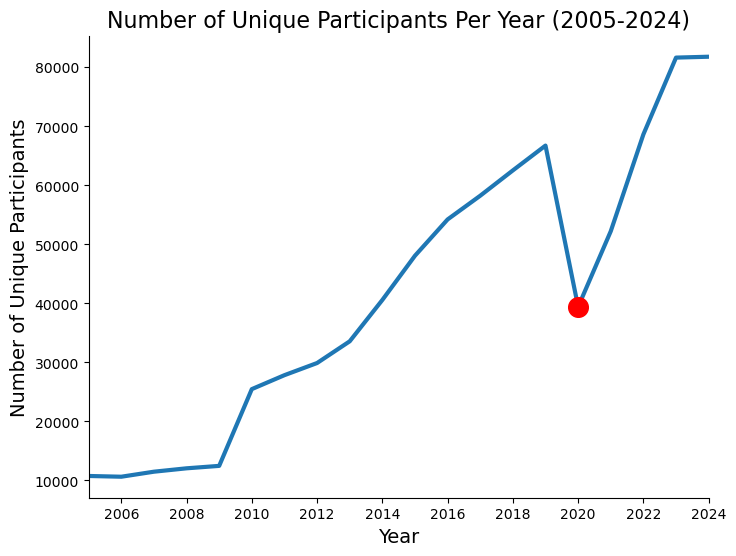

In [15]:
# importing matplotlib for plotting and ticker for integer ticks
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# making a copy of the dataframe where individual participants are grouped by year and their unique name
lifters_per_year = powerlifting_relevant.groupby("Year")["Name"].nunique()
# this will output a series with the year as the index and the number of unique lifters as the values

# creating a line plot of lifters per year
plt.figure(figsize = (8, 6))
plt.plot(lifters_per_year.index, lifters_per_year.values, linewidth = 3)
plt.title("Number of Unique Participants Per Year (2005-2024)", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Number of Unique Participants", fontsize = 14)
plt.xlim(2005, 2024)
plt.scatter(2020, lifters_per_year.loc[2020], color = "red", s = 200, zorder = 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

This graph shows participants for all powerlifting competitions (including bench-only, squat-bench, etc) - not just Squat-Bench-Deadlift / SBD.

We can clearly see the general trend of a steady increase in participants from 2000-2009, and then a large surge following 2010. 

*Why did popularity increase sharply around 2009?*

- Better data collection and recording of results.
- 'Raw' lifting became widely recognised by many federations, reducing cost and barrier to entry. Expensive gear and equipment was no longer mandatory.
- Many federations expanded and became more standardised - more meets were being held in more cities and countries.
- YouTube and Instagram started to take off - the first fitness videos and 'influencers' started to appear.
- Commercial gyms began installing squat racks (rather than rows of treadmills and bikes).
- While powerlifting isn't an Olympic sport, the 2008 Beijing Olympics likely also increased visibility of strength sports.

Interestingly there is a large drop in participation in 2020. This will almost certainly be due to COVID-19 and lockdowns around the globe - many gyms were closed. Participation didn't drop to zero at this time, as people still held smaller private meets, and many were held online. Lockdown restrictions also differed between countries.

There is also a smaller drop in 2025 - this is because the year is not over yet at the time the data was downloaded. Also, many competitions get added to the dataset retrospectively when exact results have been confirmed.

We can plot a barchart to see the top 10 countries where powerlifting is most popular.

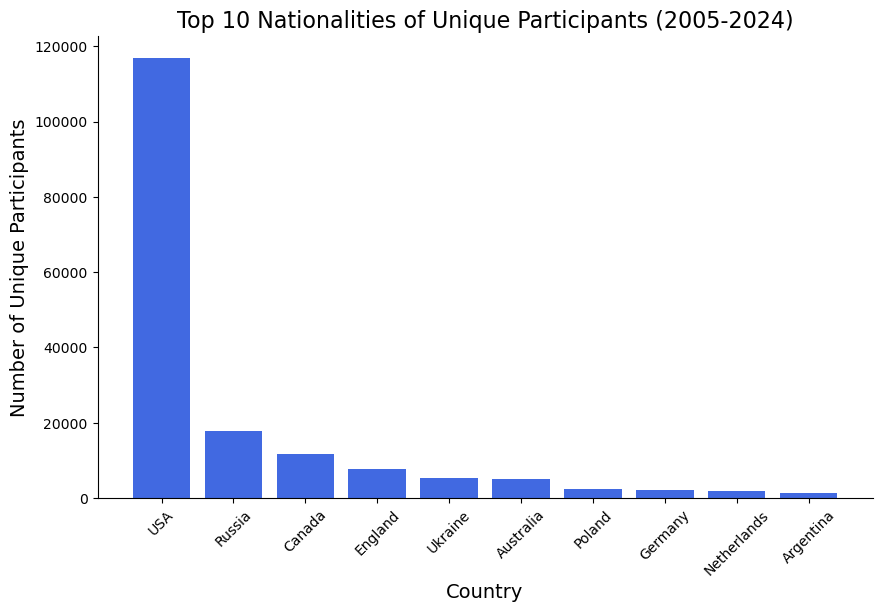

In [16]:
# bar chart of the top 10 countries by number of unique lifters from 2000 to 2025
lifters_per_country = powerlifting_relevant.groupby("Country")["Name"].nunique().sort_values(ascending = False).head(10)
plt.figure(figsize = (10, 6))
plt.bar(lifters_per_country.index, lifters_per_country.values, color = "royalblue")
plt.title("Top 10 Nationalities of Unique Participants (2005-2024)", fontsize = 16)
plt.xlabel("Country", fontsize = 14)
plt.ylabel("Number of Unique Participants", fontsize = 14)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

It looks as though the USA is heavily over-represented in the data.

This looks to be due to a bias in data collection - OpenPowerlifting receives more complete and consistent submissions from US-based federations.

Many participants also have 'NaN' in the Country column:

In [17]:
# checking number of NaN values in 'Country'
nan_countries = powerlifting_relevant["Country"].isna().sum()
print(f"Number of NaN values in 'Country': {nan_countries}")

Number of NaN values in 'Country': 658382


That's over 650,000 participations without nationalities recorded.

The MeetCountry column could be a better indicator of how popular powerlifting is across the globe - it is likely more complete.

In [18]:
# checking the number of NaN values in 'MeetCountry'
nan_meet_countries = powerlifting_relevant["MeetCountry"].isna().sum()
print(f"Number of NaN values in 'MeetCountry': {nan_meet_countries}")

Number of NaN values in 'MeetCountry': 0


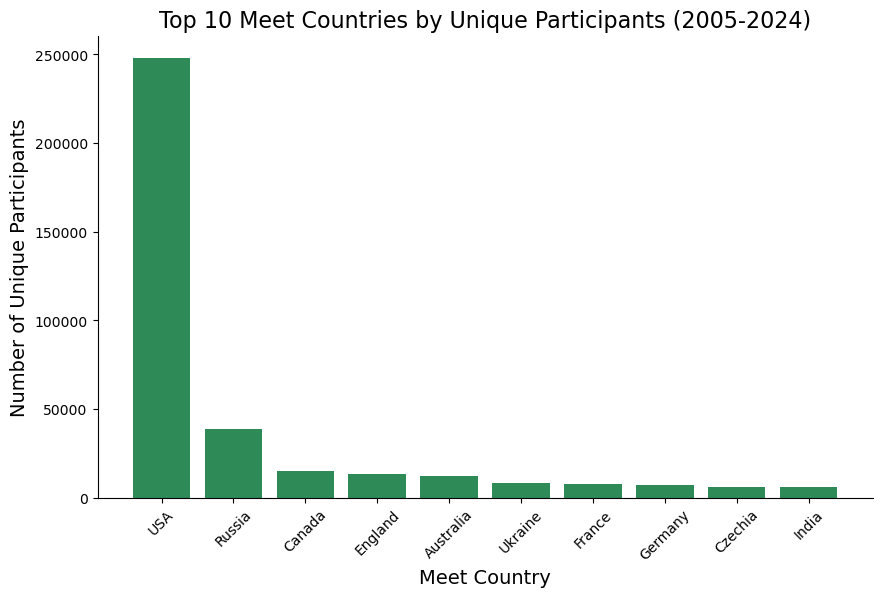

In [19]:
# plotting a barchart of the top 10 meet countries by number of unique lifters from 2000 to 2025
lifters_per_meet_country = powerlifting_relevant.groupby("MeetCountry")["Name"].nunique().sort_values(ascending = False).head(10)
plt.figure(figsize = (10, 6))
plt.bar(lifters_per_meet_country.index, lifters_per_meet_country.values, color = "seagreen")
plt.title("Top 10 Meet Countries by Unique Participants (2005-2024)", fontsize = 16)
plt.xlabel("Meet Country", fontsize = 14)
plt.ylabel("Number of Unique Participants", fontsize = 14)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

It looks like most competitions recorded in the data are still predominantly US-based.

### Trends in Strength over Time

The next question I wanted to ask was, given the growth in popularity of powerlifting, has overall strength increased over time?

For this question, will look at only SBD events - competitors of these meets will have an SBD total. This will show the combined weight of every lift.

We can also plot the lifts on their own too.

For Best3SquatKg, Best3BenchKg, and Best3DeadliftKg, some values are negative - these need to be removed as they are failed attempts.

In [20]:
# creating a copy of the dataframe where negative 'Best3SquatKg', 'Best3BenchKg', and 'Best3DeadliftKg' values are filtered out
powerlifting_filtered = powerlifting_relevant[(powerlifting_relevant["Best3SquatKg"] >= 0) & 
                                              (powerlifting_relevant["Best3BenchKg"] >= 0) & 
                                              (powerlifting_relevant["Best3DeadliftKg"] >= 0)].copy()

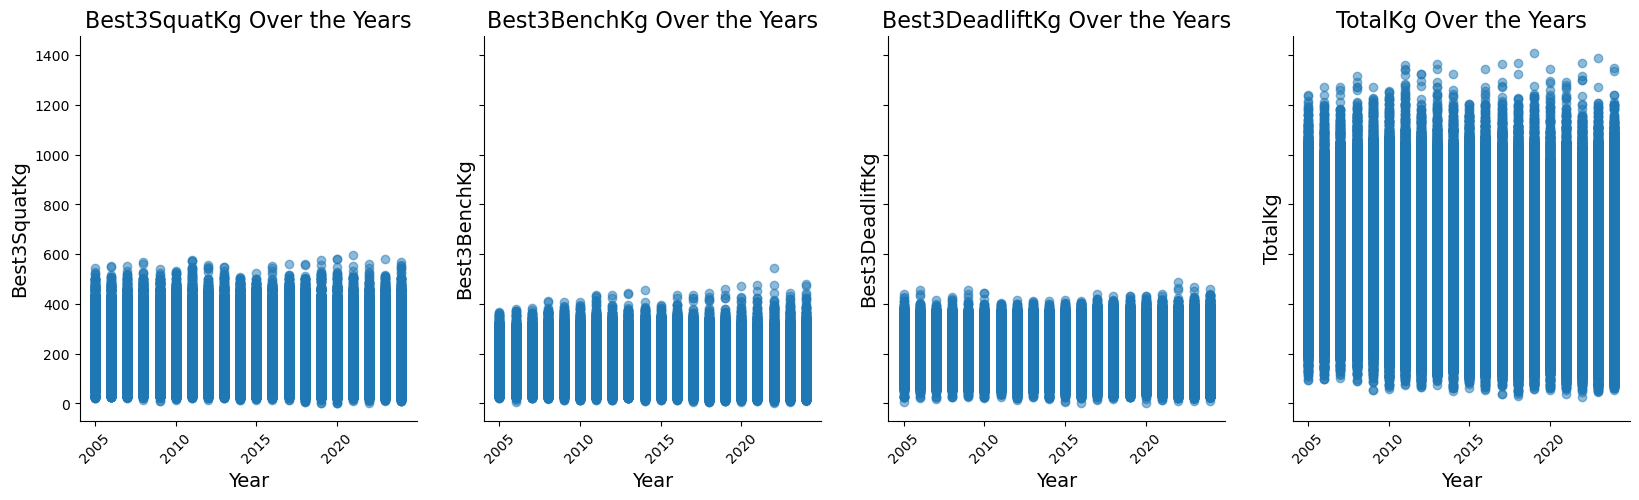

In [21]:
# creating axes to get each individual plot side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# plotting a scatter plot of mean squat, bench, deadlift, and total kg lifted over the years
for i, ax in zip(["Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg", "TotalKg"], axes):
    ax.scatter(powerlifting_filtered["Year"], powerlifting_filtered[i], alpha=0.5)
    ax.set_title(f"{i} Over the Years", fontsize=16)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel(i, fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

These graphs are too messy to get any proper insight from. 

A potentially better graph I could try to make would be the mean total weight lifted each year, for different bodyweight classes. This would remove some of the noise in the data and also the confounding variable of bodyweight.

In [22]:
# checking top 10 value counts in WeightClassKg
print(powerlifting_filtered["WeightClassKg"].value_counts())

WeightClassKg
100      89778
90       89334
93       86348
83       83900
82.5     77687
         ...  
144.5        1
117.5        1
36.2         1
37           1
75+          1
Name: count, Length: 130, dtype: int64


There are 130 different weight 'classes' in the dataset, probably due to incorrect and inconsistent data collection.

I could use the top 5 most common weight classes for the graph.

In [23]:
# printing the top 5 value counts in WeightClassKg
print(powerlifting_filtered["WeightClassKg"].value_counts().head())

WeightClassKg
100     89778
90      89334
93      86348
83      83900
82.5    77687
Name: count, dtype: int64


In [24]:
# checking data type of WeightClassKg
powerlifting_filtered["WeightClassKg"].dtype

dtype('O')

In [25]:
# it is an object data type, which means it is being treated as a string rather than a numeric value
# converting WeightClassKg to floats, and accounting for the '+' sign in some weight classes
powerlifting_filtered["WeightClassKg"] = (powerlifting_filtered["WeightClassKg"].astype(str).str.replace("+", "", regex=False).replace("", "0").astype(float))

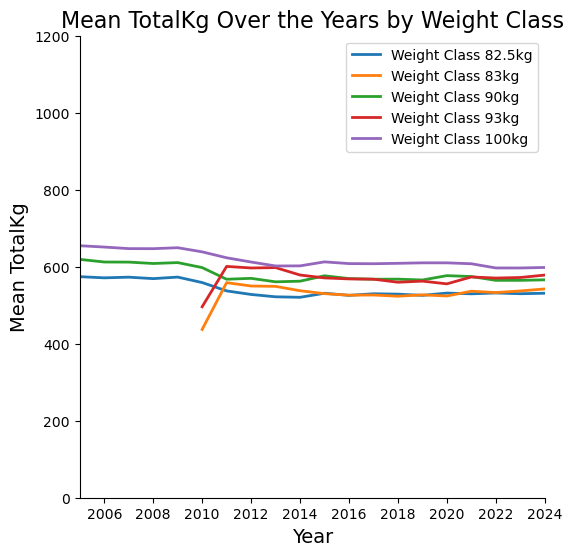

In [29]:
# plotting mean totalkg each year for each weight class

# defining the weight classes to plot
weight_classes = [82.5, 83, 90, 93, 100]

plt.figure(figsize=(6, 6))

# looping over each weight class and plotting the mean TotalKg per year
for wc in weight_classes:
    wc_data = powerlifting_filtered[powerlifting_filtered["WeightClassKg"] == wc]
    mean_totalkg_per_year = wc_data.groupby("Year")["TotalKg"].mean()
    
    plt.plot(mean_totalkg_per_year.index, mean_totalkg_per_year.values, label = f'Weight Class {wc}kg', linewidth = 2)
plt.title("Mean TotalKg Over the Years by Weight Class", fontsize = 16)
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Mean TotalKg", fontsize = 14)
plt.legend()
plt.xlim(2005, 2024)
plt.ylim(0, 1200)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

It looks like TotalKg lifted has stayed fairly constant over time, with maybe the slightest decrease around 2011.

The 83kg class (yellow) and 93kg class (red) first appear around 2010 as this was when some federations like the IPF started to use them as a new weight class.

### Correlations between Bodyweights and Strength

In [30]:
# writing a function that takes the dataframe and weight class as inputs and returns a correlation matrix plot with best squat, bench, deadlift, and total kg

# importing seaborn for heatmap plotting
import seaborn as sns

# defining the function
def correlation_matrix_by_weight_class(df, weight_class):
    
    # filtering the dataframe for the specified weight class
    wc_data = df[df["WeightClassKg"] == weight_class]

    # checking if the weight class exists in the dataframe
    if wc_data.empty:
        print(f"No data available for weight class {weight_class}kg.")
        return
    
    # selecting only the relevant columns for correlation
    corr_data = wc_data[["Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg", "TotalKg"]].dropna()

    # checking if there are enough data points to calculate correlation
    if len(corr_data) < 2:
        print(f"Not enough data to calculate correlation for weight class {weight_class}kg.")
        return
    
    # calculating the correlation matrix
    corr_matrix = corr_data.corr()
    
    # plotting the correlation matrix
    plt.figure(figsize = (8, 6))
    sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
    plt.title(f'Correlation Matrix for Weight Class {weight_class}kg', fontsize = 16)
    plt.show()

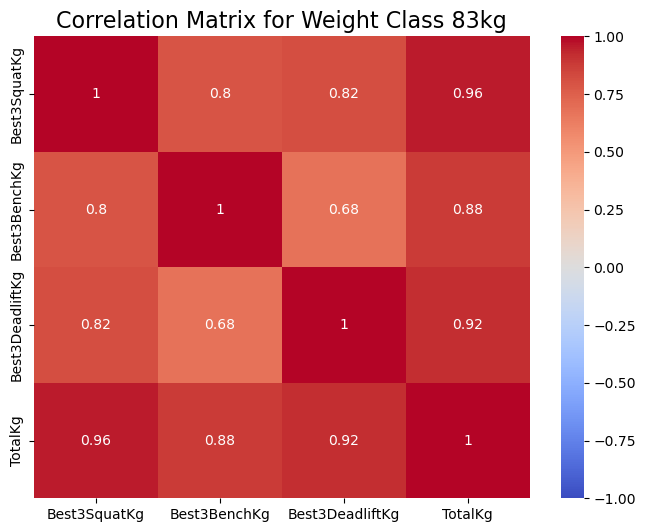

In [31]:
correlation_matrix_by_weight_class(powerlifting_filtered, 83)